In [ ]:
from google.colab import drive

drive.mount('/content/drive')
%cd drive/MyDrive

Mounted at /content/drive
/content/drive/MyDrive


In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import os
import cv2
import matplotlib.pyplot as plt

In [ ]:
train_df = pd.read_csv("/content/drive/MyDrive/DACON_BASIC/train.csv")
train_df

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,1,28.0,Company Invited,1,10.0,Small Business,Male,3,4.0,Basic,3.0,Married,3.0,0,1,0,1.0,Executive,20384.0,0
1,2,34.0,Self Enquiry,3,NaN,Small Business,Female,2,4.0,Deluxe,4.0,Single,1.0,1,5,1,0.0,Manager,19599.0,1
2,3,45.0,Company Invited,1,NaN,Salaried,Male,2,3.0,Deluxe,4.0,Married,2.0,0,4,1,0.0,Manager,NaN,0
3,4,29.0,Company Invited,1,7.0,Small Business,Male,3,5.0,Basic,4.0,Married,3.0,0,4,0,1.0,Executive,21274.0,1
4,5,42.0,Self Enquiry,3,6.0,Salaried,Male,2,3.0,Deluxe,3.0,Divorced,2.0,0,3,1,0.0,Manager,19907.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,1951,28.0,Self Enquiry,1,10.0,Small Business,Male,3,5.0,Basic,3.0,Single,2.0,0,1,1,2.0,Executive,20723.0,0
1951,1952,41.0,Self Enquiry,3,8.0,Salaried,Female,3,3.0,Super Deluxe,5.0,Divorced,1.0,0,5,1,1.0,AVP,31595.0,0
1952,1953,38.0,Company Invited,3,28.0,Small Business,Female,3,4.0,Basic,3.0,Divorced,7.0,0,2,1,2.0,Executive,21651.0,0
1953,1954,28.0,Self Enquiry,3,30.0,Small Business,Female,3,5.0,Deluxe,3.0,Married,3.0,0,1,1,2.0,Manager,22218.0,0


In [ ]:
train_df.shape

(1955, 20)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1955 entries, 0 to 1954
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1955 non-null   int64  
 1   Age                       1861 non-null   float64
 2   TypeofContact             1945 non-null   object 
 3   CityTier                  1955 non-null   int64  
 4   DurationOfPitch           1853 non-null   float64
 5   Occupation                1955 non-null   object 
 6   Gender                    1955 non-null   object 
 7   NumberOfPersonVisiting    1955 non-null   int64  
 8   NumberOfFollowups         1942 non-null   float64
 9   ProductPitched            1955 non-null   object 
 10  PreferredPropertyStar     1945 non-null   float64
 11  MaritalStatus             1955 non-null   object 
 12  NumberOfTrips             1898 non-null   float64
 13  Passport                  1955 non-null   int64  
 14  PitchSat

- id : 샘플 아이디
- Age : 나이
- TypeofContact : 고객의 제품 인지 방법 (회사의 홍보 or 스스로 검색)
- CityTier : 주거 중인 도시의 등급. (인구, 시설, 생활 수준 기준) (1등급 > 2등급 > 3등급) 
- DurationOfPitch : 영업 사원이 고객에게 제공하는 프레젠테이션 기간
- Occupation : 직업
- Gender : 성별
- NumberOfPersonVisiting : 고객과 함께 여행을 계획 중인 총 인원
- NumberOfFollowups : 영업 사원의 프레젠테이션 후 이루어진 후속 조치 수
- ProductPitched : 영업 사원이 제시한 상품
- PreferredPropertyStar : 선호 호텔 숙박업소 등급
- MaritalStatus : 결혼여부
- NumberOfTrips : 평균 연간 여행 횟수
- Passport : 여권 보유 여부 (0: 없음, 1: 있음)
- PitchSatisfactionScore : 영업 사원의 프레젠테이션 만족도
- OwnCar : 자동차 보유 여부 (0: 없음, 1: 있음)
- NumberOfChildrenVisiting : 함께 여행을 계획 중인 5세 미만의 어린이 수
- Designation : (직업의) 직급
- MonthlyIncome : 월 급여
- ProdTaken : 여행 패키지 신청 여부 (0: 신청 안 함, 1: 신청함)


In [ ]:
train_df['TypeofContact'].value_counts()

Self Enquiry       1379
Company Invited     566
Name: TypeofContact, dtype: int64

In [ ]:
train_df['Occupation'].value_counts()

Salaried          965
Small Business    826
Large Business    163
Free Lancer         1
Name: Occupation, dtype: int64

In [ ]:
train_df['Gender'].value_counts()

Male      1207
Female     748
Name: Gender, dtype: int64

In [ ]:
# 'Fe Male'로 저장되어 있는 값들 'Female'로 변경

train_df.loc[train_df['Gender'] == 'Fe Male', 'Gender'] = 'Female'

In [ ]:
train_df['Gender'].value_counts()

Male      1207
Female     748
Name: Gender, dtype: int64

In [ ]:
train_df['ProductPitched'].value_counts()

Basic           745
Deluxe          689
Standard        302
Super Deluxe    130
King             89
Name: ProductPitched, dtype: int64

In [ ]:
train_df['MaritalStatus'].value_counts()

Married      949
Divorced     375
Single       349
Unmarried    282
Name: MaritalStatus, dtype: int64

In [ ]:
train_df['Designation'].value_counts()

Executive         745
Manager           689
Senior Manager    302
AVP               130
VP                 89
Name: Designation, dtype: int64

## 2. 데이터 탐색 (이상치, 결측치 등 확인)

### 수치형 변수

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103

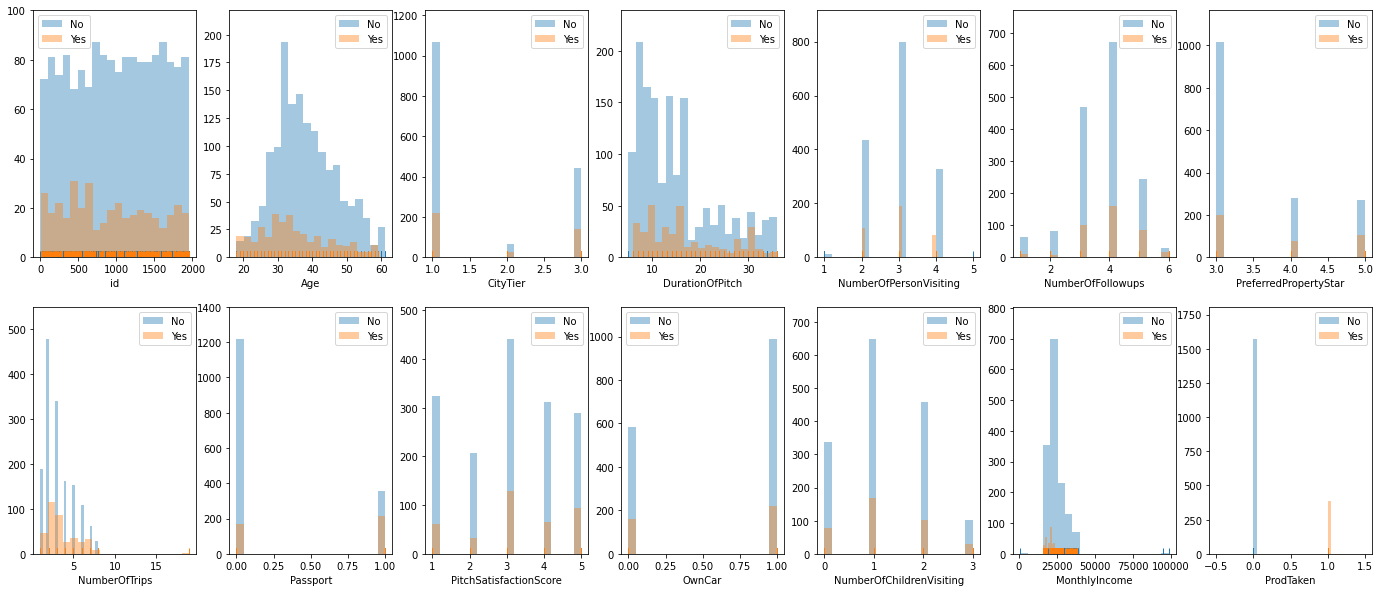

In [ ]:
cols = train_df.select_dtypes(exclude=['object']).columns
fig, axes = plt.subplots(2, 7,  figsize=(24,10))
for i, col in enumerate(cols):
    if i <=6:
        k = i
        j  = 0
    else:
        j = 1
        k = i-7
    g = sns.distplot(train_df[train_df['ProdTaken']==0][col], hist=True, kde=False, rug=True, bins=20, label="No"   , ax = axes[j][k])
    h = sns.distplot(train_df[train_df['ProdTaken']==1][col], hist=True, kde=False, rug=True, bins=20, label="Yes", ax = axes[j][k])
    axes[j][k].legend()
    plt.xlabel(col)
plt.show()
plt.close()

여행 패키지 신청한 고객과 신청하지 않은 고객의 분포가 비슷함

### 범주형 변수

In [ ]:
train_df.select_dtypes(include=['object']).columns

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

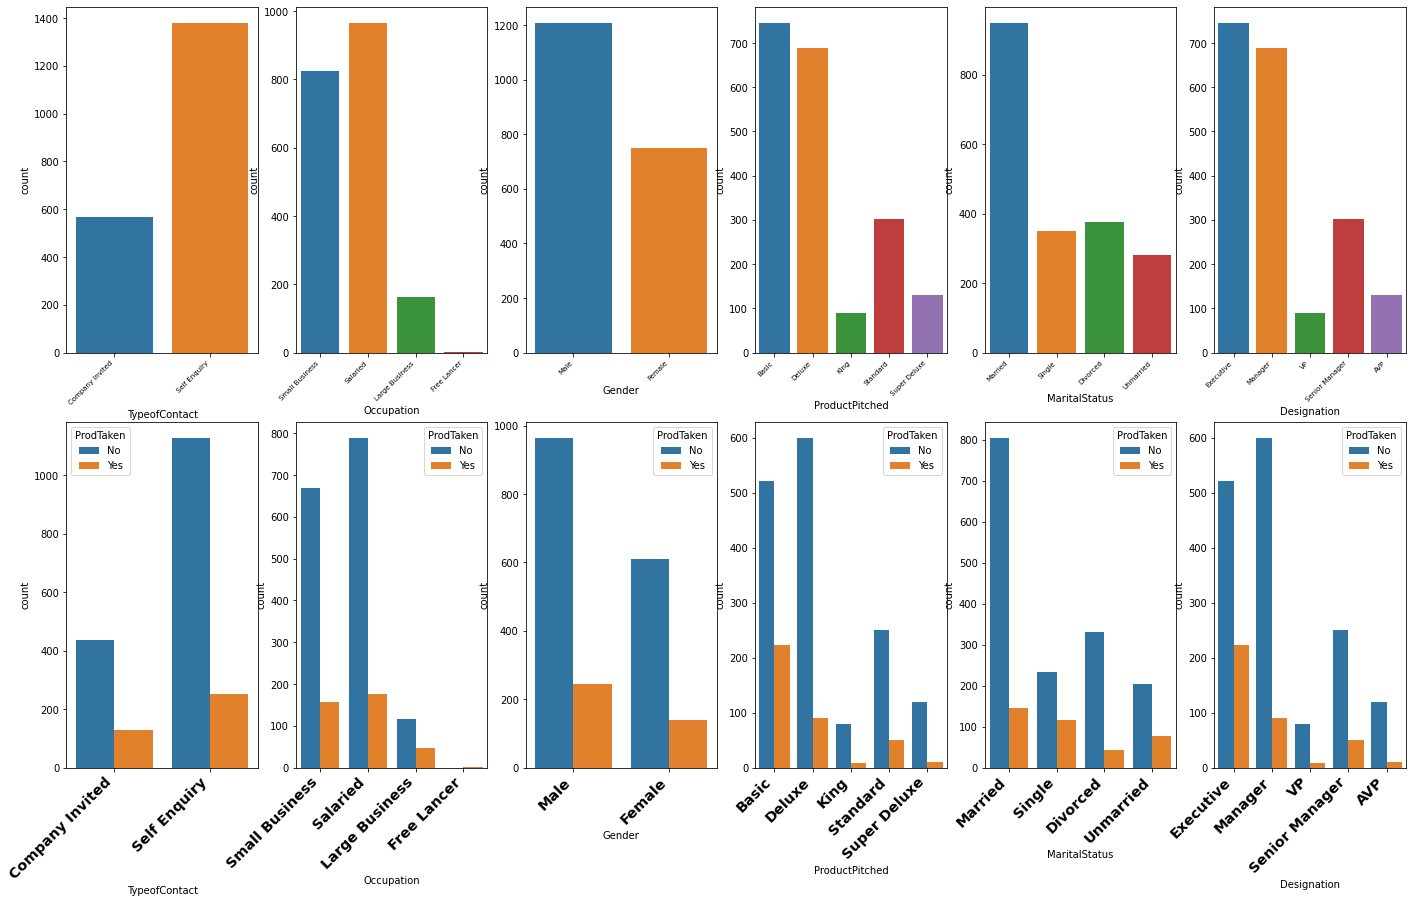

In [ ]:
fig, axes = plt.subplots(2, 6,  figsize=(24,14))
for i, col in enumerate(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']):
    g = sns.countplot(train_df[col] , ax = axes[0][i])
    # axes[i].legend()
    g.set_xticklabels(g.get_xticklabels(), rotation=45,
                  horizontalalignment='right',
                  fontweight='light',
                  fontsize='x-small'
                 )
    plt.xlabel(col)
for i, col in enumerate(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']):
    g = sns.countplot(train_df[col],  hue = train_df['ProdTaken'].map({0:'No', 1:'Yes'}) , ax = axes[1][i])
    # axes[i].legend()
    g.set_xticklabels(g.get_xticklabels(), rotation=45,
                  horizontalalignment='right',
                  fontweight='heavy',
                  fontsize='x-large'
                 )
    plt.xlabel(col)


plt.show()
plt.close()

#### 2-1. 결측치

In [ ]:
train_df.isnull().sum()

id                            0
Age                          94
TypeofContact                10
CityTier                      0
DurationOfPitch             102
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            13
ProductPitched                0
PreferredPropertyStar        10
MaritalStatus                 0
NumberOfTrips                57
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     27
Designation                   0
MonthlyIncome               100
ProdTaken                     0
dtype: int64

In [ ]:
train_df.columns

Index(['id', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome',
       'ProdTaken'],
      dtype='object')

In [ ]:
# Age (94개)

print(train_df['Age'].mean())
print(train_df['Age'].median())

37.46211714132187
36.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


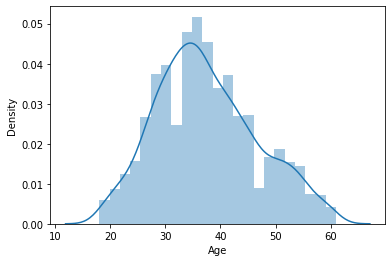

In [ ]:
sns.distplot(train_df['Age'])

In [ ]:
# 중앙값(36)으로 대체

train_df['Age'] = train_df['Age'].fillna(train_df.Age.median())

In [ ]:
# TypeofContact (10개)

train_df['TypeofContact'].value_counts()

Self Enquiry       1379
Company Invited     566
Name: TypeofContact, dtype: int64

In [ ]:
# TypeofContact(범주형)의 결측치(10개)는 삭제

train_df.dropna(subset=['TypeofContact'], inplace=True)

In [ ]:
train_df.isnull().sum()

id                           0
Age                          0
TypeofContact                0
CityTier                     0
DurationOfPitch             92
Occupation                   0
Gender                       0
NumberOfPersonVisiting       0
NumberOfFollowups           13
ProductPitched               0
PreferredPropertyStar       10
MaritalStatus                0
NumberOfTrips               57
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisiting    27
Designation                  0
MonthlyIncome               90
ProdTaken                    0
dtype: int64

In [ ]:
# DurationOfPitch (102개)

print(train_df['DurationOfPitch'].mean())
print(train_df['DurationOfPitch'].median())

15.524015110631408
14.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


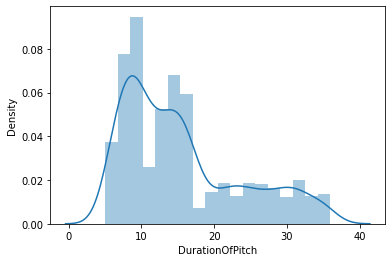

In [ ]:
sns.distplot(train_df['DurationOfPitch'])

In [ ]:
# 중앙값(14)으로 대체

train_df['DurationOfPitch'] = train_df['DurationOfPitch'].fillna(train_df.DurationOfPitch.median())

In [ ]:
# NumberOfFollowups (13개)

print(train_df['NumberOfFollowups'].mean())
print(train_df['NumberOfFollowups'].median())

3.718331616889804
4.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


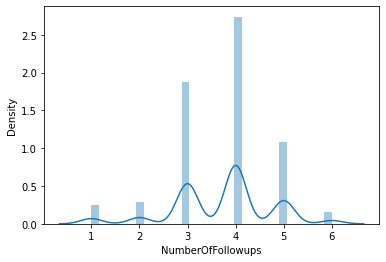

In [ ]:
sns.distplot(train_df['NumberOfFollowups'])

In [ ]:
# 중앙값(4)으로 대체

train_df['NumberOfFollowups'] = train_df['NumberOfFollowups'].fillna(train_df.NumberOfFollowups.median())

In [ ]:
# PreferredPropertyStar (10개)

print(train_df['PreferredPropertyStar'].mean())
print(train_df['PreferredPropertyStar'].median())

3.568637532133676
3.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


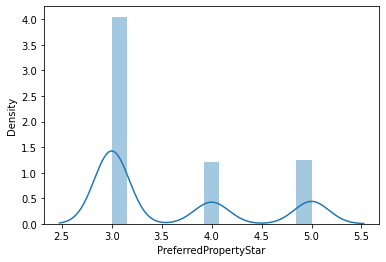

In [ ]:
sns.distplot(train_df['PreferredPropertyStar'])

In [ ]:
# 중앙값(3)으로 대체

train_df['PreferredPropertyStar'] = train_df['PreferredPropertyStar'].fillna(train_df.PreferredPropertyStar.median())

In [ ]:
# NumberOfTrips (57개)

print(train_df['NumberOfTrips'].mean())
print(train_df['NumberOfTrips'].median())

3.255532139093783
3.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


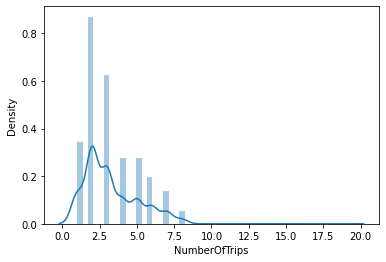

In [ ]:
sns.distplot(train_df['NumberOfTrips'])

In [ ]:
# 중앙값(3)으로 대체

train_df['NumberOfTrips'] = train_df['NumberOfTrips'].fillna(train_df.NumberOfTrips.median())

In [ ]:
# NumberOfChildrenVisiting (27개)

print(train_df['NumberOfChildrenVisiting'].mean())
print(train_df['NumberOfChildrenVisiting'].median())

1.213174273858921
1.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


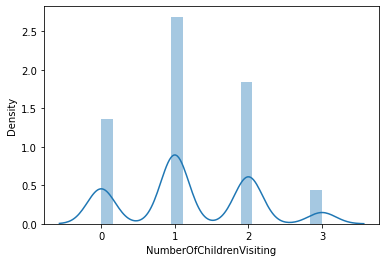

In [ ]:
sns.distplot(train_df['NumberOfChildrenVisiting'])

In [ ]:
# 중앙값(1)으로 대체

train_df['NumberOfChildrenVisiting'] = train_df['NumberOfChildrenVisiting'].fillna(train_df.NumberOfChildrenVisiting.median())

In [ ]:
# MonthlyIncome (100개)

print(train_df['MonthlyIncome'].mean())
print(train_df['MonthlyIncome'].median())

23624.108894878707
22295.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


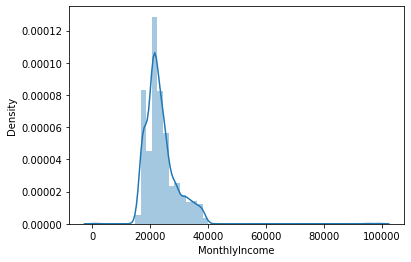

In [ ]:
sns.distplot(train_df['MonthlyIncome'])

In [ ]:
# 평균값(23624.108894878707)으로 대체

train_df['MonthlyIncome'] = train_df['MonthlyIncome'].fillna(train_df.MonthlyIncome.mean())

In [ ]:
train_df.isnull().sum()

id                          0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
ProdTaken                   0
dtype: int64

#### 2-2. 이상치

In [ ]:
train_df.dtypes

id                            int64
Age                         float64
TypeofContact                object
CityTier                      int64
DurationOfPitch             float64
Occupation                   object
Gender                       object
NumberOfPersonVisiting        int64
NumberOfFollowups           float64
ProductPitched               object
PreferredPropertyStar       float64
MaritalStatus                object
NumberOfTrips               float64
Passport                      int64
PitchSatisfactionScore        int64
OwnCar                        int64
NumberOfChildrenVisiting    float64
Designation                  object
MonthlyIncome               float64
ProdTaken                     int64
dtype: object

In [ ]:
def outlier_iqr(data, column): 

    # lower, upper 글로벌 변수 선언하기     
    global lower, upper    
    
    # 4분위수 기준 지정하기     
    q25, q75 = np.quantile(data[column], 0.25), np.quantile(data[column], 0.75)          
    
    # IQR 계산하기     
    iqr = q75 - q25    
    
    # outlier cutoff 계산하기     
    cut_off = iqr * 1.5          
    
    # lower와 upper bound 값 구하기     
    lower, upper = q25 - cut_off, q75 + cut_off     
    
    print('IQR은',iqr, '이다.')     
    print('lower bound 값은', lower, '이다.')     
    print('upper bound 값은', upper, '이다.')    
    
    # 1사 분위와 4사 분위에 속해있는 데이터 각각 저장하기     
    data1 = data[data[column] > upper]     
    data2 = data[data[column] < lower]    
    
    # 이상치 총 개수 구하기
    return print('총 이상치 개수는', data1.shape[0] + data2.shape[0], '이다.')

In [ ]:
train_df.columns

Index(['id', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome',
       'ProdTaken'],
      dtype='object')

In [ ]:
# object 타입 제외 (TypeofContact, Occupation, Gender, ProductPitched, MaritalStatus, Designation)

index = ['id', 'Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisiting', 
         'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 
         'OwnCar', 'NumberOfChildrenVisiting', 'MonthlyIncome', 'ProdTaken']

In [ ]:
for i in range(len(index)):
  print('==============================')
  print('%d번째 변수: %s' %(i+1,index[i]))
  outlier_iqr(train_df, index[i])

1번째 변수: id
IQR은 974.0 이다.
lower bound 값은 -970.0 이다.
upper bound 값은 2926.0 이다.
총 이상치 개수는 0 이다.
2번째 변수: Age
IQR은 12.0 이다.
lower bound 값은 13.0 이다.
upper bound 값은 61.0 이다.
총 이상치 개수는 0 이다.
3번째 변수: CityTier
IQR은 2.0 이다.
lower bound 값은 -2.0 이다.
upper bound 값은 6.0 이다.
총 이상치 개수는 0 이다.
4번째 변수: DurationOfPitch
IQR은 10.0 이다.
lower bound 값은 -6.0 이다.
upper bound 값은 34.0 이다.
총 이상치 개수는 44 이다.
5번째 변수: NumberOfPersonVisiting
IQR은 1.0 이다.
lower bound 값은 0.5 이다.
upper bound 값은 4.5 이다.
총 이상치 개수는 1 이다.
6번째 변수: NumberOfFollowups
IQR은 1.0 이다.
lower bound 값은 1.5 이다.
upper bound 값은 5.5 이다.
총 이상치 개수는 120 이다.
7번째 변수: PreferredPropertyStar
IQR은 1.0 이다.
lower bound 값은 1.5 이다.
upper bound 값은 5.5 이다.
총 이상치 개수는 0 이다.
8번째 변수: NumberOfTrips
IQR은 2.0 이다.
lower bound 값은 -1.0 이다.
upper bound 값은 7.0 이다.
총 이상치 개수는 38 이다.
9번째 변수: Passport
IQR은 1.0 이다.
lower bound 값은 -1.5 이다.
upper bound 값은 2.5 이다.
총 이상치 개수는 0 이다.
10번째 변수: PitchSatisfactionScore
IQR은 2.0 이다.
lower bound 값은 -1.0 이다.
upper bound 값은 7.0 이다.
총 이상치 개수는 0 이다.
11번째 변

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


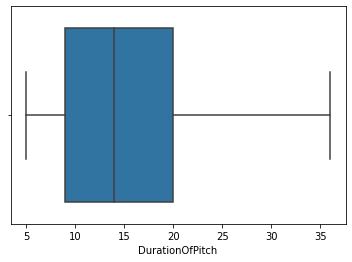

In [ ]:
# DurationOfPitch : 영업 사원이 고객에게 제공하는 프레젠테이션 기간 (44개)

sns.boxplot(train_df['DurationOfPitch'])

In [ ]:
print(train_df['DurationOfPitch'].mean())
print(train_df['DurationOfPitch'].median())

15.451928020565553
14.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


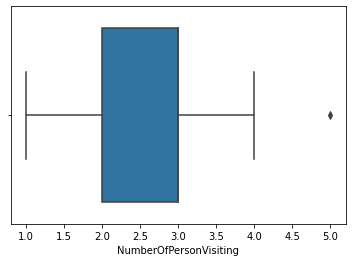

In [ ]:
# NumberOfPersonVisiting : 고객과 함께 여행을 계획 중인 총 인원 (1개)

sns.boxplot(train_df['NumberOfPersonVisiting'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


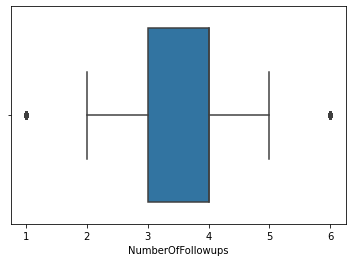

In [ ]:
# NumberOfFollowups : 영업 사원의 프레젠테이션 후 이루어진 후속 조치 수 (120개)

sns.boxplot(train_df['NumberOfFollowups'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


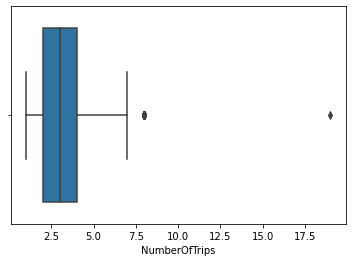

In [ ]:
# NumberOfTrips : 평균 연간 여행 횟수 (38개)

sns.boxplot(train_df['NumberOfTrips'])

DurationOfPitch, NumberOfPersonVisiting, NumberOfFollowups, NumberOfTrips 변수에서 이상치는 충분히 가능한 값이라 생각되어 삭제하거나 대체하지 않음

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


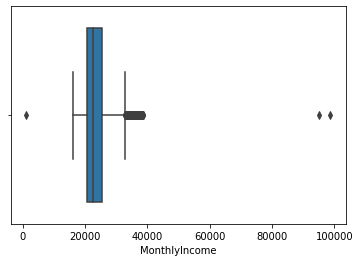

In [ ]:
# MonthlyIncome : 월 급여 (144) 

sns.boxplot(train_df['MonthlyIncome'])

In [ ]:
train_df['MonthlyIncome'].describe()

count     1945.000000
mean     23624.108895
std       5508.368323
min       1000.000000
25%      20556.000000
50%      22642.000000
75%      25445.000000
max      98678.000000
Name: MonthlyIncome, dtype: float64

In [ ]:
# MonthlyIncome > 50000 인 행 삭제

idx = train_df[train_df['MonthlyIncome'] > 50000].index
train_df.drop(idx, inplace=True)

In [ ]:
idx

Int64Index([604, 1338], dtype='int64')

In [ ]:
train_df.select_dtypes(exclude=['object']).columns

Index(['id', 'Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips',
       'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'MonthlyIncome', 'ProdTaken'],
      dtype='object')

In [ ]:
train_df.dtypes

id                            int64
Age                         float64
TypeofContact                object
CityTier                      int64
DurationOfPitch             float64
Occupation                   object
Gender                       object
NumberOfPersonVisiting        int64
NumberOfFollowups           float64
ProductPitched               object
PreferredPropertyStar       float64
MaritalStatus                object
NumberOfTrips               float64
Passport                      int64
PitchSatisfactionScore        int64
OwnCar                        int64
NumberOfChildrenVisiting    float64
Designation                  object
MonthlyIncome               float64
ProdTaken                     int64
dtype: object

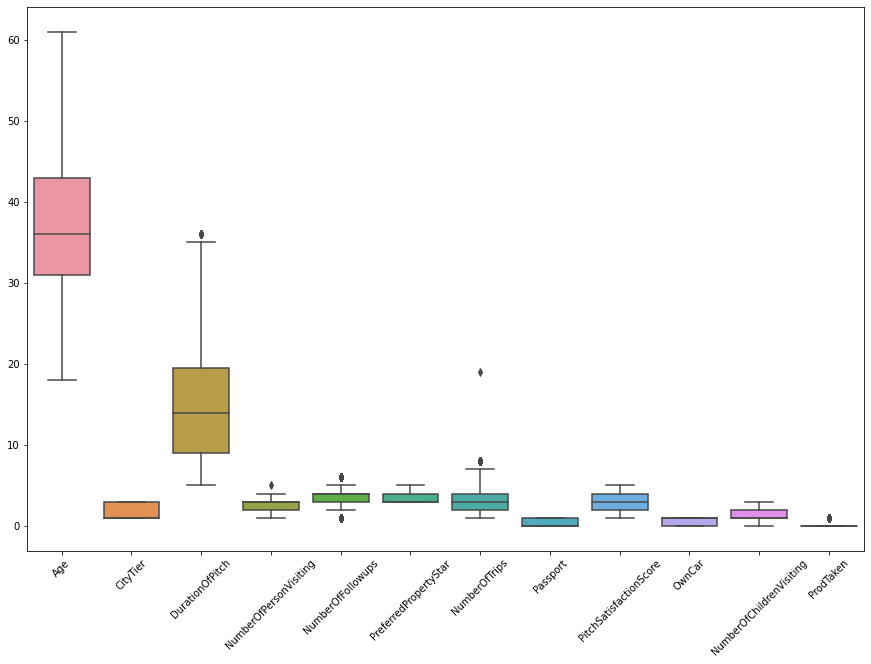

In [ ]:
new_df = train_df[['Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisiting','NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips','Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting', 'ProdTaken']]

plt.figure(figsize=(15,10))
plt.xticks(rotation=45)
sns.boxplot(data=new_df)

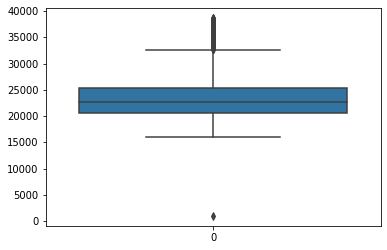

In [ ]:
sns.boxplot(data=train_df['MonthlyIncome'])

In [ ]:
train_df.to_csv('/content/drive/MyDrive/DACON_BASIC/eda.csv')

## 3. 데이터의 개별 속성값 관찰

#### 3-1. target 값 확인
ProdTaken : 여행 패키지 신청 여부 (0: 신청 안 함, 1: 신청함)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


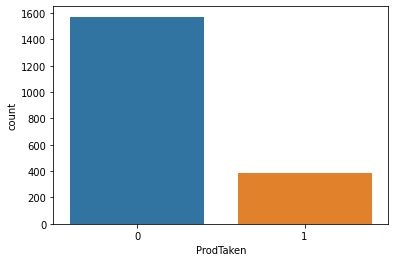

In [ ]:
sns.countplot(train_df['ProdTaken'])

## 4. 속성 간의 관계 -> 패턴 발견 (상관관계, 시각화 등)

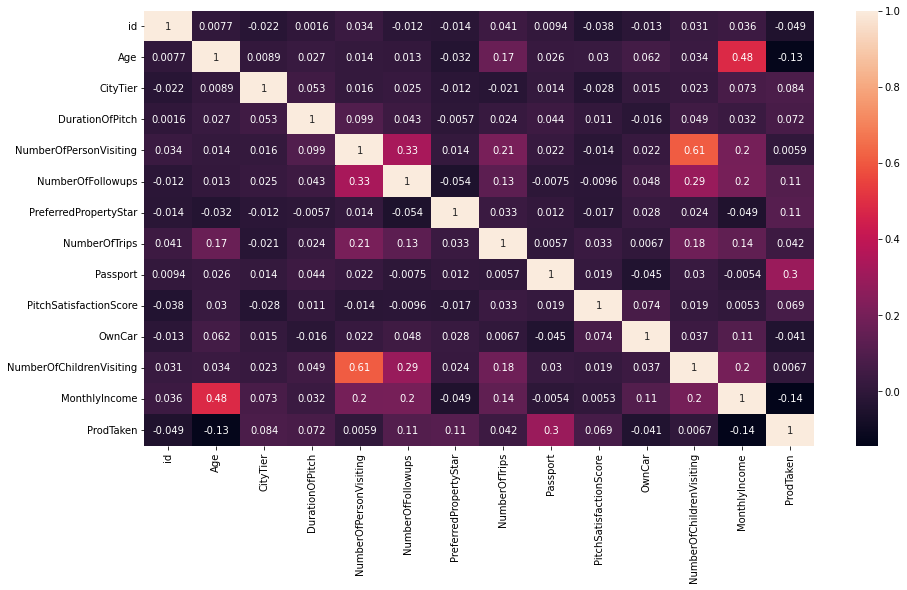

In [ ]:
plt.figure(figsize = (15,8))
sns.heatmap(train_df.corr(), annot=True)

Age와 MonthlyIncome, NumberOfPersonVisiting과 NumberOfPersonVisiting 간의 상관관계가 높게 나타남

## 5. 범주형 변수 변환

In [ ]:
train_df.dtypes

id                            int64
Age                         float64
TypeofContact                object
CityTier                      int64
DurationOfPitch             float64
Occupation                   object
Gender                       object
NumberOfPersonVisiting        int64
NumberOfFollowups           float64
ProductPitched               object
PreferredPropertyStar       float64
MaritalStatus                object
NumberOfTrips               float64
Passport                      int64
PitchSatisfactionScore        int64
OwnCar                        int64
NumberOfChildrenVisiting    float64
Designation                  object
MonthlyIncome               float64
ProdTaken                     int64
dtype: object

In [ ]:
train_df = pd.get_dummies(train_df,columns = ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation'])

In [ ]:
train_df

,id,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,...,ProductPitched_Super Deluxe,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_AVP,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,1,28.0,1,10.0,3,4.0,3.0,3.0,0,1,...,0,0,1,0,0,0,1,0,0,0
1,2,34.0,3,14.0,2,4.0,4.0,1.0,1,5,...,0,0,0,1,0,0,0,1,0,0
2,3,45.0,1,14.0,2,3.0,4.0,2.0,0,4,...,0,0,1,0,0,0,0,1,0,0
3,4,29.0,1,7.0,3,5.0,4.0,3.0,0,4,...,0,0,1,0,0,0,1,0,0,0
4,5,42.0,3,6.0,2,3.0,3.0,2.0,0,3,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,1951,28.0,1,10.0,3,5.0,3.0,2.0,0,1,...,0,0,0,1,0,0,1,0,0,0
1951,1952,41.0,3,8.0,3,3.0,5.0,1.0,0,5,...,1,1,0,0,0,1,0,0,0,0
1952,1953,38.0,3,28.0,3,4.0,3.0,7.0,0,2,...,0,1,0,0,0,0,1,0,0,0
1953,1954,28.0,3,30.0,3,5.0,3.0,3.0,0,1,...,0,0,1,0,0,0,0,1,0,0


## 6. 모델 적용

### 6-1. 랜덤포레스트 (RandomForestClassifier)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 모델 선언
model = RandomForestClassifier(n_estimators=5, random_state=0)

In [ ]:
# 학습에 사용할 정보와 예측하고자 하는 정보를 분리합니다.
x = train_df.drop(columns=['ProdTaken'])
y = train_df[['ProdTaken']]

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=42)

In [ ]:
print(x_train.shape, y_train.shape)

(1165, 35) (1165, 1)


In [ ]:
print(x_test.shape, y_test.shape)

(778, 35) (778, 1)


In [ ]:
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
pred_test_y = model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(pred_test_y, y_test)

0.19023136246786632

### 6-2. XGBClassifier

In [ ]:
from xgboost import XGBClassifier
from xgboost import plot_importance

# 객체 생성
model = XGBClassifier(learning_rate=0.1)

In [ ]:
xgb_model = model.fit(x_train, y_train)
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

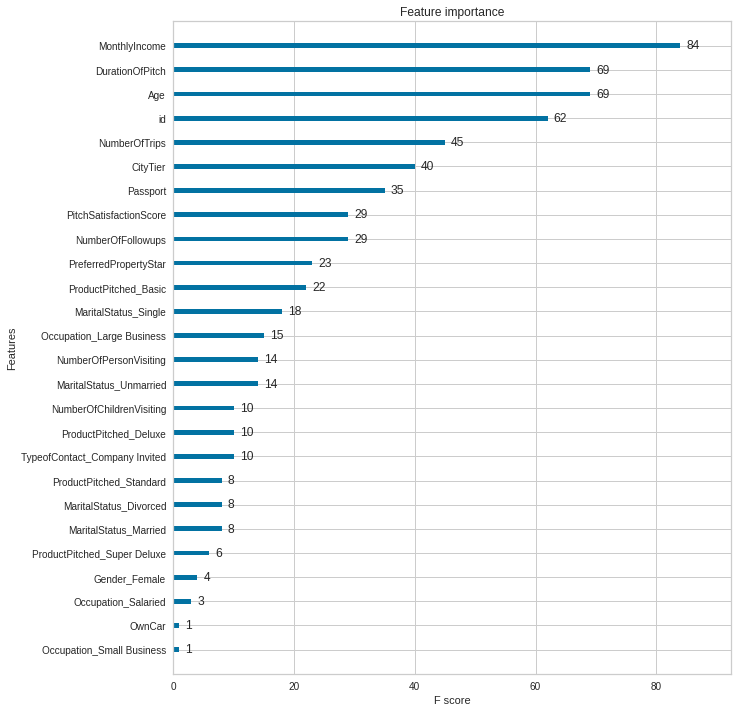

In [ ]:
# 예측하기
pred_test_y = model.predict(x_test)

# 특성 중요도 시각화
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model, ax=ax)

### 6-3. LGBMClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score

lgbm = LGBMClassifier(n_estimators=200)

params = {'max_depth': [10, 15, 20],
          'min_child_samples': [20, 40, 60],
          'subsample': [0.8, 1]}

grid = GridSearchCV(lgbm, param_grid=params)
grid.fit(x_train, y_train, early_stopping_rounds=100, eval_metric='auc',
         eval_set=[(x_train, y_train), (x_test, y_test)])

print("최적 파라미터: ", grid.best_params_)
lgbm_roc_score = roc_auc_score(y_test, grid.predict_proba(x_test)[:, 1], average='macro')
print("ROC AUC: {0:.4f}".format(lgbm_roc_score))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[104]	valid_0's auc: 0.96106	valid_0's binary_logloss: 0.206166	valid_1's auc: 0.782211	valid_1's binary_logloss: 0.414594
[105]	valid_0's auc: 0.96127	valid_0's binary_logloss: 0.205444	valid_1's auc: 0.783024	valid_1's binary_logloss: 0.414334
[106]	valid_0's auc: 0.961427	valid_0's binary_logloss: 0.204736	valid_1's auc: 0.783827	valid_1's binary_logloss: 0.413464
[107]	valid_0's auc: 0.96169	valid_0's binary_logloss: 0.203691	valid_1's auc: 0.784121	valid_1's binary_logloss: 0.413466
[108]	valid_0's auc: 0.961977	valid_0's binary_logloss: 0.202732	valid_1's auc: 0.783857	valid_1's binary_logloss: 0.413927
[109]	valid_0's auc: 0.962822	valid_0's binary_logloss: 0.201315	valid_1's auc: 0.784457	valid_1's binary_logloss: 0.414175
[110]	valid_0's auc: 0.962775	valid_0's binary_logloss: 0.200639	valid_1's auc: 0.784528	valid_1's binary_logloss: 0.414419
[111]	valid_0's auc: 0.962985	valid_0's binary_logloss: 0.199888	valid_1's auc: 0.785056	valid_1's 

In [ ]:
lgbm = LGBMClassifier(max_depth=10, min_child_samples=60, subsample=0.8)

evals = [(x_test, y_test)]
lgbm.fit(x_train, y_train, early_stopping_rounds=100, eval_metric='auc',
         eval_set=evals, verbose=True)

score = roc_auc_score(y_test, grid.predict_proba(x_test)[:, 1], average='macro')
print("ROC AUC: {0:.4f}".format(score))

[1]	valid_0's auc: 0.731338	valid_0's binary_logloss: 0.489827
[2]	valid_0's auc: 0.718668	valid_0's binary_logloss: 0.478778
[3]	valid_0's auc: 0.72199	valid_0's binary_logloss: 0.469994
[4]	valid_0's auc: 0.721914	valid_0's binary_logloss: 0.460804
[5]	valid_0's auc: 0.725668	valid_0's binary_logloss: 0.455896
[6]	valid_0's auc: 0.73086	valid_0's binary_logloss: 0.450309
[7]	valid_0's auc: 0.734985	valid_0's binary_logloss: 0.446355
[8]	valid_0's auc: 0.737957	valid_0's binary_logloss: 0.441886
[9]	valid_0's auc: 0.744308	valid_0's binary_logloss: 0.438135
[10]	valid_0's auc: 0.740807	valid_0's binary_logloss: 0.437589
[11]	valid_0's auc: 0.743469	valid_0's binary_logloss: 0.435069
[12]	valid_0's auc: 0.742885	valid_0's binary_logloss: 0.434261
[13]	valid_0's auc: 0.747996	valid_0's binary_logloss: 0.431078
[14]	valid_0's auc: 0.746645	valid_0's binary_logloss: 0.430669
[15]	valid_0's auc: 0.75206	valid_0's binary_logloss: 0.427937
[16]	valid_0's auc: 0.754605	valid_0's binary_loglos

- https://libertegrace.tistory.com/entry/Classification-4-%EC%95%99%EC%83%81%EB%B8%94-%ED%95%99%EC%8A%B5Ensemble-Learning-Boosting3-XGBoost
- https://greeksharifa.github.io/machine_learning/2019/12/09/Light-GBM/
- https://teddylee777.github.io/scikit-learn/grid-search-%EB%A1%9C-hyperparameter%EC%B5%9C%EC%A0%81%ED%99%94
- https://kimdingko-world.tistory.com/175
- https://steadiness-193.tistory.com/268

### 6-4. SVM

In [ ]:
# https://liveyourit.tistory.com/62

1. 군집 (중간발표때 만든게 있죠.. 이거 이어서?)
- k개수대로 각자 만들고
- 전처리 + EDA : 주영
- 모델 : 재원

2. 데이콘
- 전처리 : 호경
- EDA : 나경
- model : 민영

3. 모델 각자 정해서

**1. 모델별 성능 비교**
  - logistic regression
  - KNN (K-Nearest Neighbor)
  - Naives Bayes
  - Decision Tree Classifier
  - SVM
  - Ridge
  - Random Forest Classifier
  - XGBRegressor
  - Ada Boost Classifier
  - Gradient Boosting Classifier (GBM)
  - Light Gradient Boosting (LGBM)
  - CatBoost Classifier

**2. 하이퍼파라미터 조정**
  - randomsearch
  - gridsearch
  - Bayesian Optimization

(https://velog.io/@crosstar1228/MLHyperparameter-tuning-%EA%B8%B0%EB%B2%95%EC%9D%98-3%EA%B0%80%EC%A7%80GridSearch-RandomSearch-Bayesian-Optimization)